<hr>
<p><font color='crimson'><h1 align="center">Travaux pratiques sur les réseaux d'eau</h1></font><a href="http://www.mines-paristech.fr/">Mines ParisTech</a>.</p>

## Elhamdi kaouther -- Bouazzi Khaoula
## 0. Données et fonctions du problème

### On charge dans l'environnement :
1. les fonctions de Python qui seront utilisées,
2. les données du problème,
3. les fonctions utilitaires du problème.

In [1]:
from numpy import random
import numpy as np

In [2]:
from Probleme_R import *
from Structures_N import *

In [3]:
from Visualg import Visualg
from Verification import Verification

###  On charge les prototypes d'algorithmes d'optimisation :

* **Gradient_F** : algorithme de gradient à pas fixe,
* **Newton_F** : algorithme de Newton à pas fixe.

In [4]:
def Gradient_F(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables
    
    iter_max = 10000
    gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations

    for k in range(iter_max):
        
        # Valeur du critere et du gradient
        critere, gradient = Oracle(x)

        # Test de convergence
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break

        # Direction de descente
        direction = -gradient
        
        # Mise a jour des variables
        x = x + (gradient_step*direction)
        
        # Evolution du gradient, du pas, et du critere
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
    
    ##### Resultats de l'optimisation

    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start
    
    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

In [5]:
def Newton_F(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from numpy.linalg import solve
    from time import process_time
    
    ##### Initialisation des variables    
    
    iter_max = 100
    gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # Valeur du critere et du gradient
        critere, gradient, hessien = Oracle(x)

        # Test de convergence
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break
        
        # Direction de descente
        direction = - solve(hessien, gradient)
        
        # Mise a jour des variables
        x = x + (gradient_step*direction)
        
        # Evolution du gradient, du pas, et du critere
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
   
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

## I. Résolution du problème primal

In [6]:
from HydrauliqueP import HydrauliqueP

### I.a On écrit les oracles pour le problème primal d'optimisation :

* **OraclePG** : calcul de la fonction et du gradient,
* **OraclePH** : calcul de la fonction du gradient et du Hessien.

In [7]:
def OraclePG(qc):
    
    q = q0+np.dot(B,qc)
    critere = (1/3)* np.vdot(q,r*q*np.absolute(q))+np.vdot(pr,np.dot(Ar,q))
    gradient = np.dot(B.T,r*q*np.absolute(q)+np.dot(Ar.T,pr))
    
    return critere, gradient

In [8]:
def OraclePH(qc):
    
    q = q0+np.dot(B,qc)
    critere, gradient = OraclePG(qc)
    hessien = 2*np.dot(np.dot(B.T,np.diag(r*np.absolute(q))),B)
    
    return critere, gradient, hessien

### On teste la validité des oracles en résolvant le problème :

* **OraclePG** avec la méthode du gradient à pas fixe,
* **OraclePH** avec la méthode de Newton à pas fixe

In [9]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT A PAS FIXE")
copt, gopt, xopt = Gradient_F(OraclePG, x0, 0.0005)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DU GRADIENT A PAS FIXE

Iteration : 4169
Temps CPU : 0.15625
Critere optimal : -3.7340070480435
Norme du gradient : 9.970403740760977e-07


<Figure size 640x480 with 2 Axes>


Verification des equations d'equilibre du reseau
Sur les debits : 1.6653345369377348e-16
Sur les pressions : 9.97035382810374e-07



MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DE NEWTON A PAS FIXE

Iteration : 6
Temps CPU : 0.0
Critere optimal : -3.734007048043562
Norme du gradient : 1.1150838881977037e-13


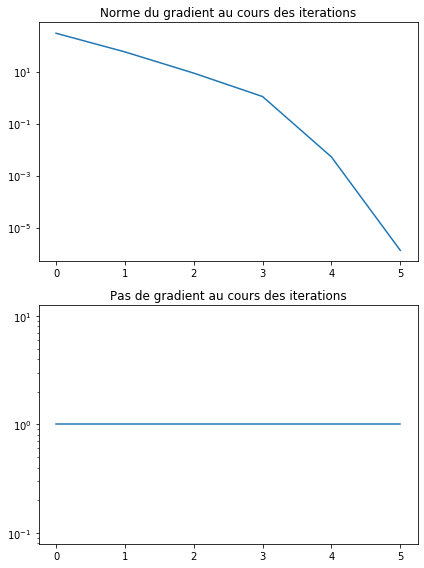


Verification des equations d'equilibre du reseau
Sur les debits : 5.551115123125783e-17
Sur les pressions : 8.407857743364389e-14


In [10]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE NEWTON A PAS FIXE")
copt, gopt, xopt = Newton_F(OraclePH, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.b On écrit l'algorithme de recherche linéaire (conditions de Wolfe).

In [11]:
def Wolfe(alpha, x, D, Oracle):
    
    from numpy import dot
    from numpy import inf
    from numpy.linalg import norm

    ##### Coefficients de la recherche lineaire
    
    omega_1 = 0.1
    omega_2 = 0.9
    
    alpha_min = 0
    alpha_max = inf
    
    ok = 0
    dltx = 0.00000001

    ##### Algorithme de Fletcher-Lemarechal
    
    # Appel de l'oracle au point initial
    argout = Oracle(x)
    critere = argout[0]
    gradient = argout[1]
    
    # Initialisation de l'algorithme
    alpha_n = alpha
    #xn = x
    
    # Boucle de calcul du pas
    # xn represente le point pour la valeur courante du pas,
    # xp represente le point pour la valeur precedente du pas.
    while ok == 0:
        
        # Point precedent pour tester l'indistinguabilite
        #xp = xn
        
        # Point actuel
        xn = x + alpha_n*D
        
        # Calcul des conditions de Wolfe
        #
        condition_Armijo = (Oracle(xn)[0] <= critere + omega_1*alpha_n*np.dot(gradient.T,D))
        condition_courbure = (np.dot(Oracle(xn)[1].T,D) >= omega_2*np.dot(gradient.T,D))
        
        # Test des conditions de Wolfe
        #
        # - Si les deux conditions de Wolfe sont verifiees,
        #   poser ok = 1 : on sort alors de la boucle while
        # - Sinon, modifier la valeur de alphan et reboucler
        #
        if (condition_Armijo == False) : 
            alpha_max = alpha_n
            alpha_n = 0.5*(alpha_min+alpha_max)
        else :
            if (condition_courbure == False) :
                alpha_min = alpha_n
                if alpha_max == inf :
                    alpha_n = 2*alpha_min
                else :
                    alpha_n = 0.5*(alpha_min+alpha_max)
            else :
                ok = 1
        
        # Test d'indistinguabilite
        if norm(xn - x) < dltx:
            ok = 2

    return alpha_n, ok

### I.c On écrit l'algorithme du gradient à pas variable et on le teste

In [12]:
def Gradient_V(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from time import process_time
    from math import log10
    
    ##### Initialisation des variables

    iter_max = 2000
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    x = x0

    ##### Boucle sur les iterations

    for k in range(iter_max):
        
        #Déterminer le critere et le gradient en x(k)
        critere_gradient = Oracle(x)
        critere = critere_gradient[0]
        gradient = critere_gradient[1]
        D = (-1)*gradient
        
        #Déterminer alpha(k) en utilisant la fonction Wolfe 
        alpha,ok = Wolfe(default_gradient_step, x, D, Oracle)
        
        #----
        gradient_norm_list.append(norm(gradient))
        gradient_step_list.append(alpha)
        critere_list.append(critere)
        
        #Test d’arrêt
        if norm(gradient)<threshold :
            break
        
        #Rebouclage 
        x = x + alpha*D
    
    ##### Resultats de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DU GRADIENT A PAS VARIABLE

Iteration : 268
Temps CPU : 0.265625
Critere optimal : -3.734007048043514
Norme du gradient : 9.537207925240355e-07


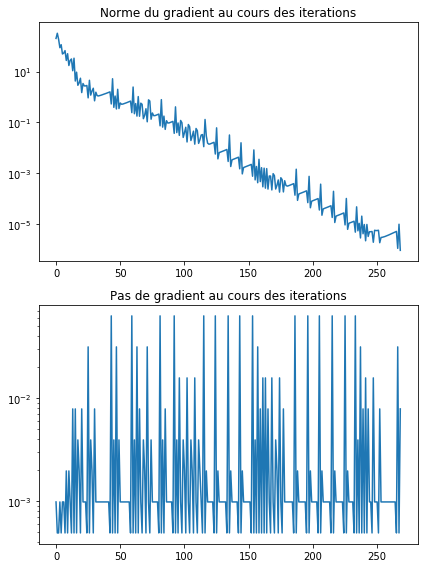


Verification des equations d'equilibre du reseau
Sur les debits : 2.220446049250313e-16
Sur les pressions : 8.696248737782852e-07


In [13]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT A PAS VARIABLE")
copt, gopt, xopt = Gradient_V(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.d On écrit l'algorithme de gradient conjugué (Polak-Ribière) et on le teste

In [14]:
def PolakRibiere(Oracle, x0, alpha0):
    
    from numpy import dot
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables
    
    iter_max = 1000
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    time_start = process_time()
    x = x0
    alpha = alpha0
    r1 = Oracle(x0)[1]
    p = -r1
    ##### Boucle sur les iterations
    for k in range(iter_max):
        l = Wolfe(alpha0, x, p, Oracle)[0]
        x = x + l*p
        r2 = Oracle(x)[1]
        beta = np.dot(r2.T, r2 - r1)/(norm(r1)**2)
        p = -r2 + np.dot(beta,p)
         
        
        #----
        gradient_norm_list.append(norm(r2))
        gradient_step_list.append(alpha)
        critere_list.append(Oracle(x)[0])
        
        if norm(r2)<threshold :
            break
        r1 = r2
        alpha = l
        
        
        
        
    gradient = Oracle(x)[1]
    critere = Oracle(x)[0]
    # Resultat de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start
    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DU GRADIENT CONJUGUE

Iteration : 209
Temps CPU : 0.1875
Critere optimal : -3.7340070480435443
Norme du gradient : 5.758275071883872e-07


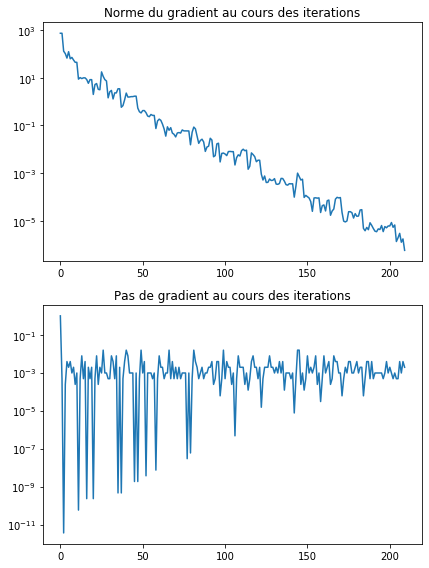


Verification des equations d'equilibre du reseau
Sur les debits : 2.220446049250313e-16
Sur les pressions : 4.937176890651429e-07


In [15]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT CONJUGUE")
copt, gopt, xopt = PolakRibiere(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.e On écrit l'algorithme de quasi-Newton (BFGS) et on le teste

In [16]:
a = np.array([1,2,3])
b = np.array([1,2,3])
#a.shape , b.shape
np.vdot(a,b)

14

In [17]:
def BFGS(Oracle, x0, alpha0):
    
    from numpy import dot
    from numpy import eye
    from numpy import outer
    from numpy import vdot
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables

    iter_max = 250
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    xn = x0
    cr_gr = Oracle(xn)
    gn = cr_gr[1]
    fn = cr_gr[0]
    shape = x0.shape[0]
    I = eye(shape)
    #I = eye(n-md)
    Wn = I
    dp = (-1)*np.dot(Wn,gn)
    
    """alpha = Wolfe(alpha0, xp, dp, Oracle)[0]
    
    gradient_norm_list.append(norm(gp))
    gradient_step_list.append(alpha)
    critere_list.append(fp)
    
    xn = xp + alpha*dp
    dx = (xn-xp).reshape(-1,1)
    cr_gr = Oracle(xn)
    gn = cr_gr[1]
    fn = cr_gr[0]
    dg = (gn - gp).reshape(-1,1)"""
    

    ##### Boucle sur les iterations
    
    for k in range(1,iter_max):
        
        xp = xn
        gp = gn
        fp = fn
        Wp = Wn
        
        
        
        alpha = Wolfe(alpha0, xp, dp, Oracle)[0]
        
        gradient_norm_list.append(norm(gp))
        gradient_step_list.append(alpha)
        critere_list.append(fp)
        
        xn = xp + alpha*dp
        
        dx = (xn-xp).reshape(-1,1)
        cr_gr = Oracle(xn)
        gn = cr_gr[1]
        fn = cr_gr[0]
        dg = (gn - gp).reshape(-1,1)
        
        aa = I-(np.matmul(dx,dg.T)*(1/np.dot(dg.T,dx)))
        Wn = np.dot(np.dot(aa,Wp),I-(np.matmul(dg,dx.T)*(1/np.dot(dg.T,dx))))+np.matmul(dx,dx.T)*(1/np.dot(dg.T,dx))
        dp = (-1)*np.dot(Wn,gn)
        
        #Test d’arrêt
        
        if norm(gp)<threshold :
            break
    
    # Resultat de l'optimisation
    critere_opt = fn
    gradient_opt = gn
    x_opt = xn
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
        
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DE QUASI-NEWTON

Iteration : 27
Temps CPU : 0.0
Critere optimal : -3.7340070480435585
Norme du gradient : 8.03966407162229e-08


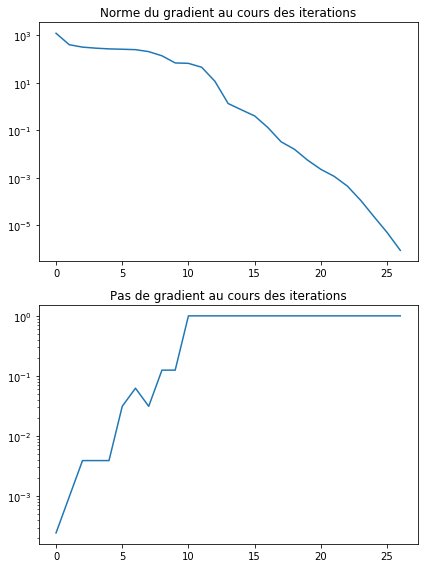


Verification des equations d'equilibre du reseau
Sur les debits : 5.551115123125783e-17
Sur les pressions : 4.973218881154651e-08


In [18]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE QUASI-NEWTON")
copt, gopt, xopt = BFGS(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.f On écrit l'algorithme de Newton à pas variable et on le teste

In [19]:
def Newton_V(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from numpy.linalg import solve
    from time import process_time
    from numpy.linalg import inv
    
    ##### Initialisation des variables  
    
    iter_max = 100
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    xn = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        xp = xn
        cr_gr_hess = Oracle(xp)
        gradient = cr_gr_hess[1]
        critere = cr_gr_hess[0]
        hessien = cr_gr_hess[2]
        #H = inv(cr_gr_hess[2])
        #dp = (-1)*np.dot(H,gradient)
        dp = - solve(hessien, gradient)
        alpha = Wolfe(alpha0, xp, dp, Oracle)[0]
        xn = xp + alpha * dp
        
        gradient_norm_list.append(norm(gradient))
        gradient_step_list.append(alpha)
        critere_list.append(critere)
        
        if norm(gradient)<threshold :
            break
        
           
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = xp
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DE NEWTON A PAS VARIABLE

Iteration : 5
Temps CPU : 0.0
Critere optimal : -3.734007048043564
Norme du gradient : 8.442246263115773e-07


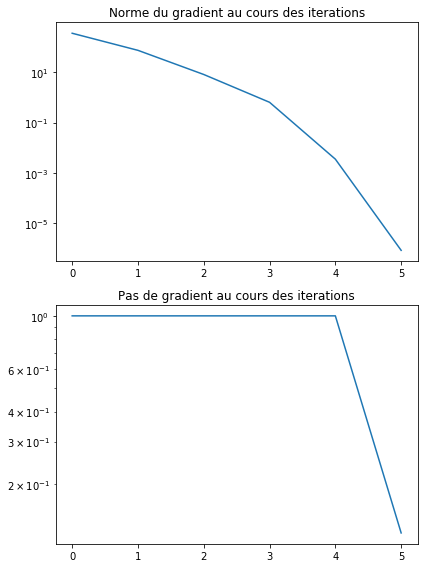


Verification des equations d'equilibre du reseau
Sur les debits : 6.938893903907228e-17
Sur les pressions : 7.399136926732053e-07


In [20]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_V(OraclePH, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

## II. Résolution du problème dual

In [21]:
from HydrauliqueD import HydrauliqueD

### II.a On écrit les oracles pour le problème dual d'optimisation :

* **OracleDG** : calcul de la fonction et du gradient,
* **OracleDH** : calcul de la fonction du gradient et du Hessien.

In [22]:
def OracleDG(pd):
    
    v = -(np.dot(Ad.T,pd)+np.dot(Ar.T,pr))/r
    
    q_signe = np.sign(v)
    q_opt = np.sqrt(np.absolute(v))*q_signe
    
    critere = 1/3*np.vdot(q_opt,r*q_opt*np.absolute(q_opt))+np.vdot(pr,np.dot(Ar,q_opt))+np.vdot(pd,np.dot(Ad,q_opt)-fd)
    gradient = np.dot(Ad,q_opt)-fd
    
    return -critere, -gradient, q_opt

In [23]:
def OracleDH(pd):
    
    critere , gradient, q_opt = OracleDG(pd)
    rq2 = 2*r*np.absolute(q_opt)
    rq2 = rq2.reshape(-1,1)
    a = -(Ad.T)/rq2
    hessien = np.dot(Ad,a)
    
    return critere, gradient, -hessien

### II.b On exécute tous les algorithmes d'optimisation déjà écrits


MINIMISATION DU PROBLEME DUAL

ALGORITHME DU GRADIENT A PAS VARIABLE

Iteration : 1999
Temps CPU : 0.84375
Critere optimal : 3.7340120042336244
Norme du gradient : 0.00024278550302142242


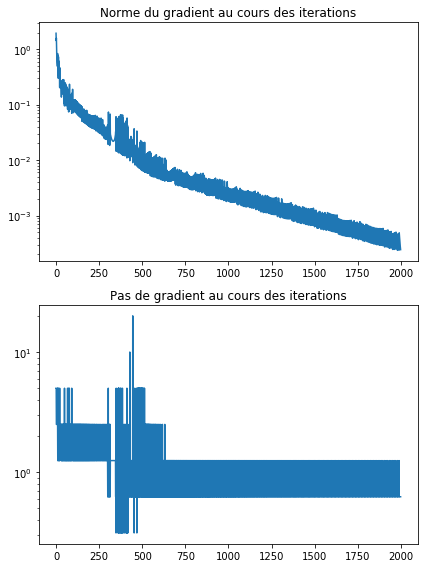


Verification des equations d'equilibre du reseau
Sur les debits : 0.00015399509931843247
Sur les pressions : 0.0


In [24]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DU GRADIENT A PAS VARIABLE")
copt, gopt, xopt = Gradient_V(OracleDG, x0, 5)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME DUAL

ALGORITHME DU GRADIENT CONJUGUE

Iteration : 444
Temps CPU : 0.28125
Critere optimal : 3.7340070480800085
Norme du gradient : 7.71214364732611e-07


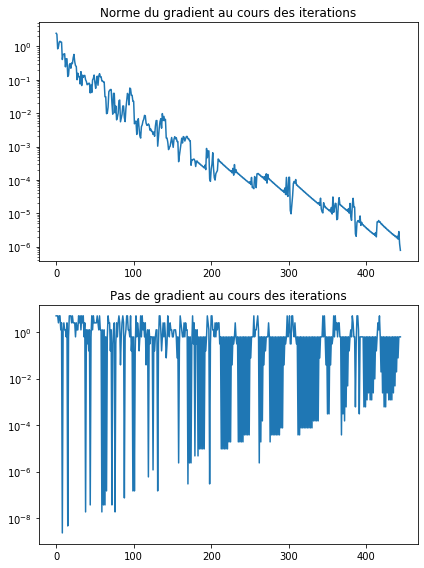


Verification des equations d'equilibre du reseau
Sur les debits : 4.233036167144988e-07
Sur les pressions : 0.0


In [25]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DU GRADIENT CONJUGUE")
copt, gopt, xopt = PolakRibiere(OracleDG, x0, 5)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME DUAL

ALGORITHME DE QUASI-NEWTON

Iteration : 66
Temps CPU : 0.015625
Critere optimal : 3.7340070480435865
Norme du gradient : 1.1920005303439966e-07


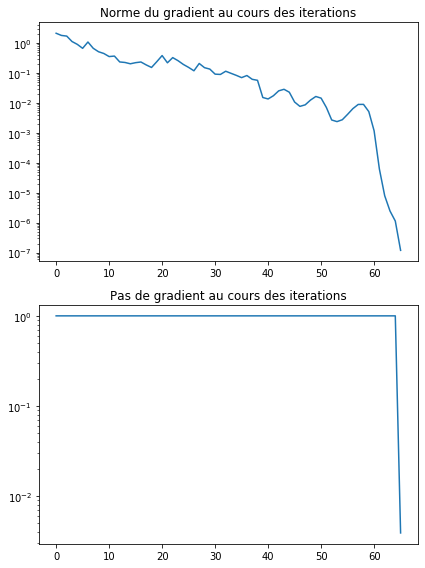


Verification des equations d'equilibre du reseau
Sur les debits : 1.0069796746448034e-07
Sur les pressions : 0.0


In [26]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DE QUASI-NEWTON")
copt, gopt, xopt = BFGS(OracleDG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME DUAL

ALGORITHME DE NEWTON A PAS VARIABLE

Iteration : 11
Temps CPU : 0.015625
Critere optimal : 3.7340070480435585
Norme du gradient : 6.3660197586255055e-09


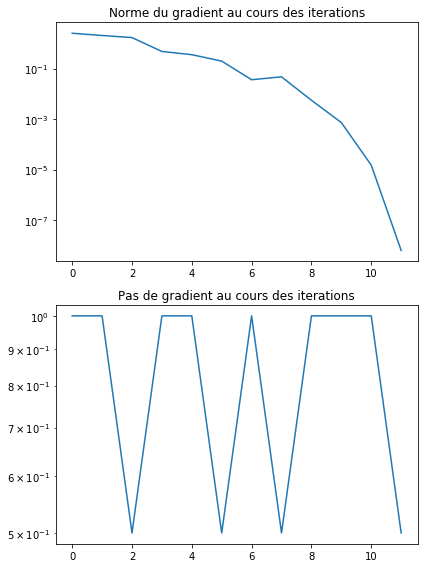


Verification des equations d'equilibre du reseau
Sur les debits : 6.366019461578887e-09
Sur les pressions : 0.0


In [27]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_V(OracleDH, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)

## III. Résolution de grands réseaux (facultatif)

### On charge dans l'environnement les données du problème

Ces données correspondent à un réseau de taille paramétrable.

In [28]:
from Probleme_P import *
from Structures_S import *


Tailles du reseau traite
Nombre de niveaux : 13
Nombre de tuyaux  : 32751
Nombre de noeuds  : 16383


### III.a On écrit des oracles primal et dual avec Hessien creux

In [29]:
def OraclePHS(qc):
    
    q = q0+B.dot(qc)
    critere = (1/3)* np.vdot(q,r*q*np.absolute(q))+np.vdot(pr,Ar.dot(q))
    gradient = B.transpose()@(r*q*np.absolute(q)+Ar.transpose().dot(pr))
    hessien = 2*B.transpose().dot(np.diag(r*np.absolute(q))).dot(B)
    
    
    return critere, gradient, hessien

In [30]:
def OracleDHS(pd):
    #-----
    #-----    
    return critere, gradient, hessien

### III.b On écrit un algorithme de Newton exploitant le creux

In [31]:
def Newton_S(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from scipy.sparse.linalg import spsolve
    from time import process_time
    
    ##### Initialisation des variables  
    
    iter_max = 100
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    xn = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        xp = xn
        critere, gradient, hessien = Oracle(xp)
        
        dp = - spsolve(hessien, gradient)
        
        alpha = Wolfe(alpha0, xp, dp, Oracle)[0]
        xn = xp + alpha * dp
        
        gradient_norm_list.append(norm(gradient))
        gradient_step_list.append(alpha)
        critere_list.append(critere)
        
        if norm(gradient)<threshold :
            break
     
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = xp
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

### III.c On résoud le problème dans le primal et dans le dual